# Boston Housing Dataset
Using the cannonical Boston Housing dataset, we'll consider these research questions:

- How much variation in **median house price** in each census tract can be explained by the characteristics present in the dataset? This is a question of _measure of fit_ of a model, and is assessed using the **R Squared** value
- What are the **strength and magnitude of association** between each characteristic (_independent variable_) and the median housing price (_dependent variable_)? This question is assessed by the _magnitude_ of the **beta values** output by the model, and the uncertainty around that estimate (captured in the Standard Error around that estimate, and the corresponding _p value_).

## Set up

In [14]:
# Import packages
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib
import altair as alt
alt.renderers.enable('notebook')
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load and format data
boston = load_boston()
bos_df = pd.DataFrame(boston.data, columns=boston.feature_names)
bos_df["med_price"] = pd.Series(boston.target * 1000)
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Data Exploration

In [3]:
# View the `head` of the data
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,med_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0f29e6a0>]],
      dtype=object)

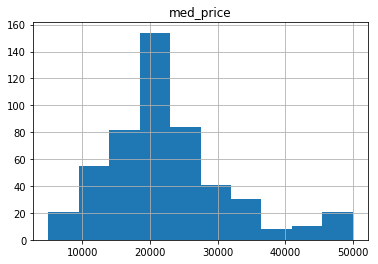

In [4]:
# What is the distribution of our outcome of interest?
bos_df.hist("med_price")

In [5]:
# How correlated is our outcome of interest with each other characteristic?
bos_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,med_price
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


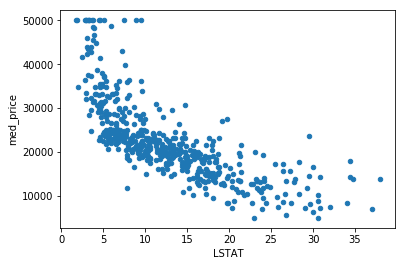

In [6]:
# Create a scatterplot comparing the median price with the most correlated feature
bos_df.plot("LSTAT", "med_price", kind="scatter")

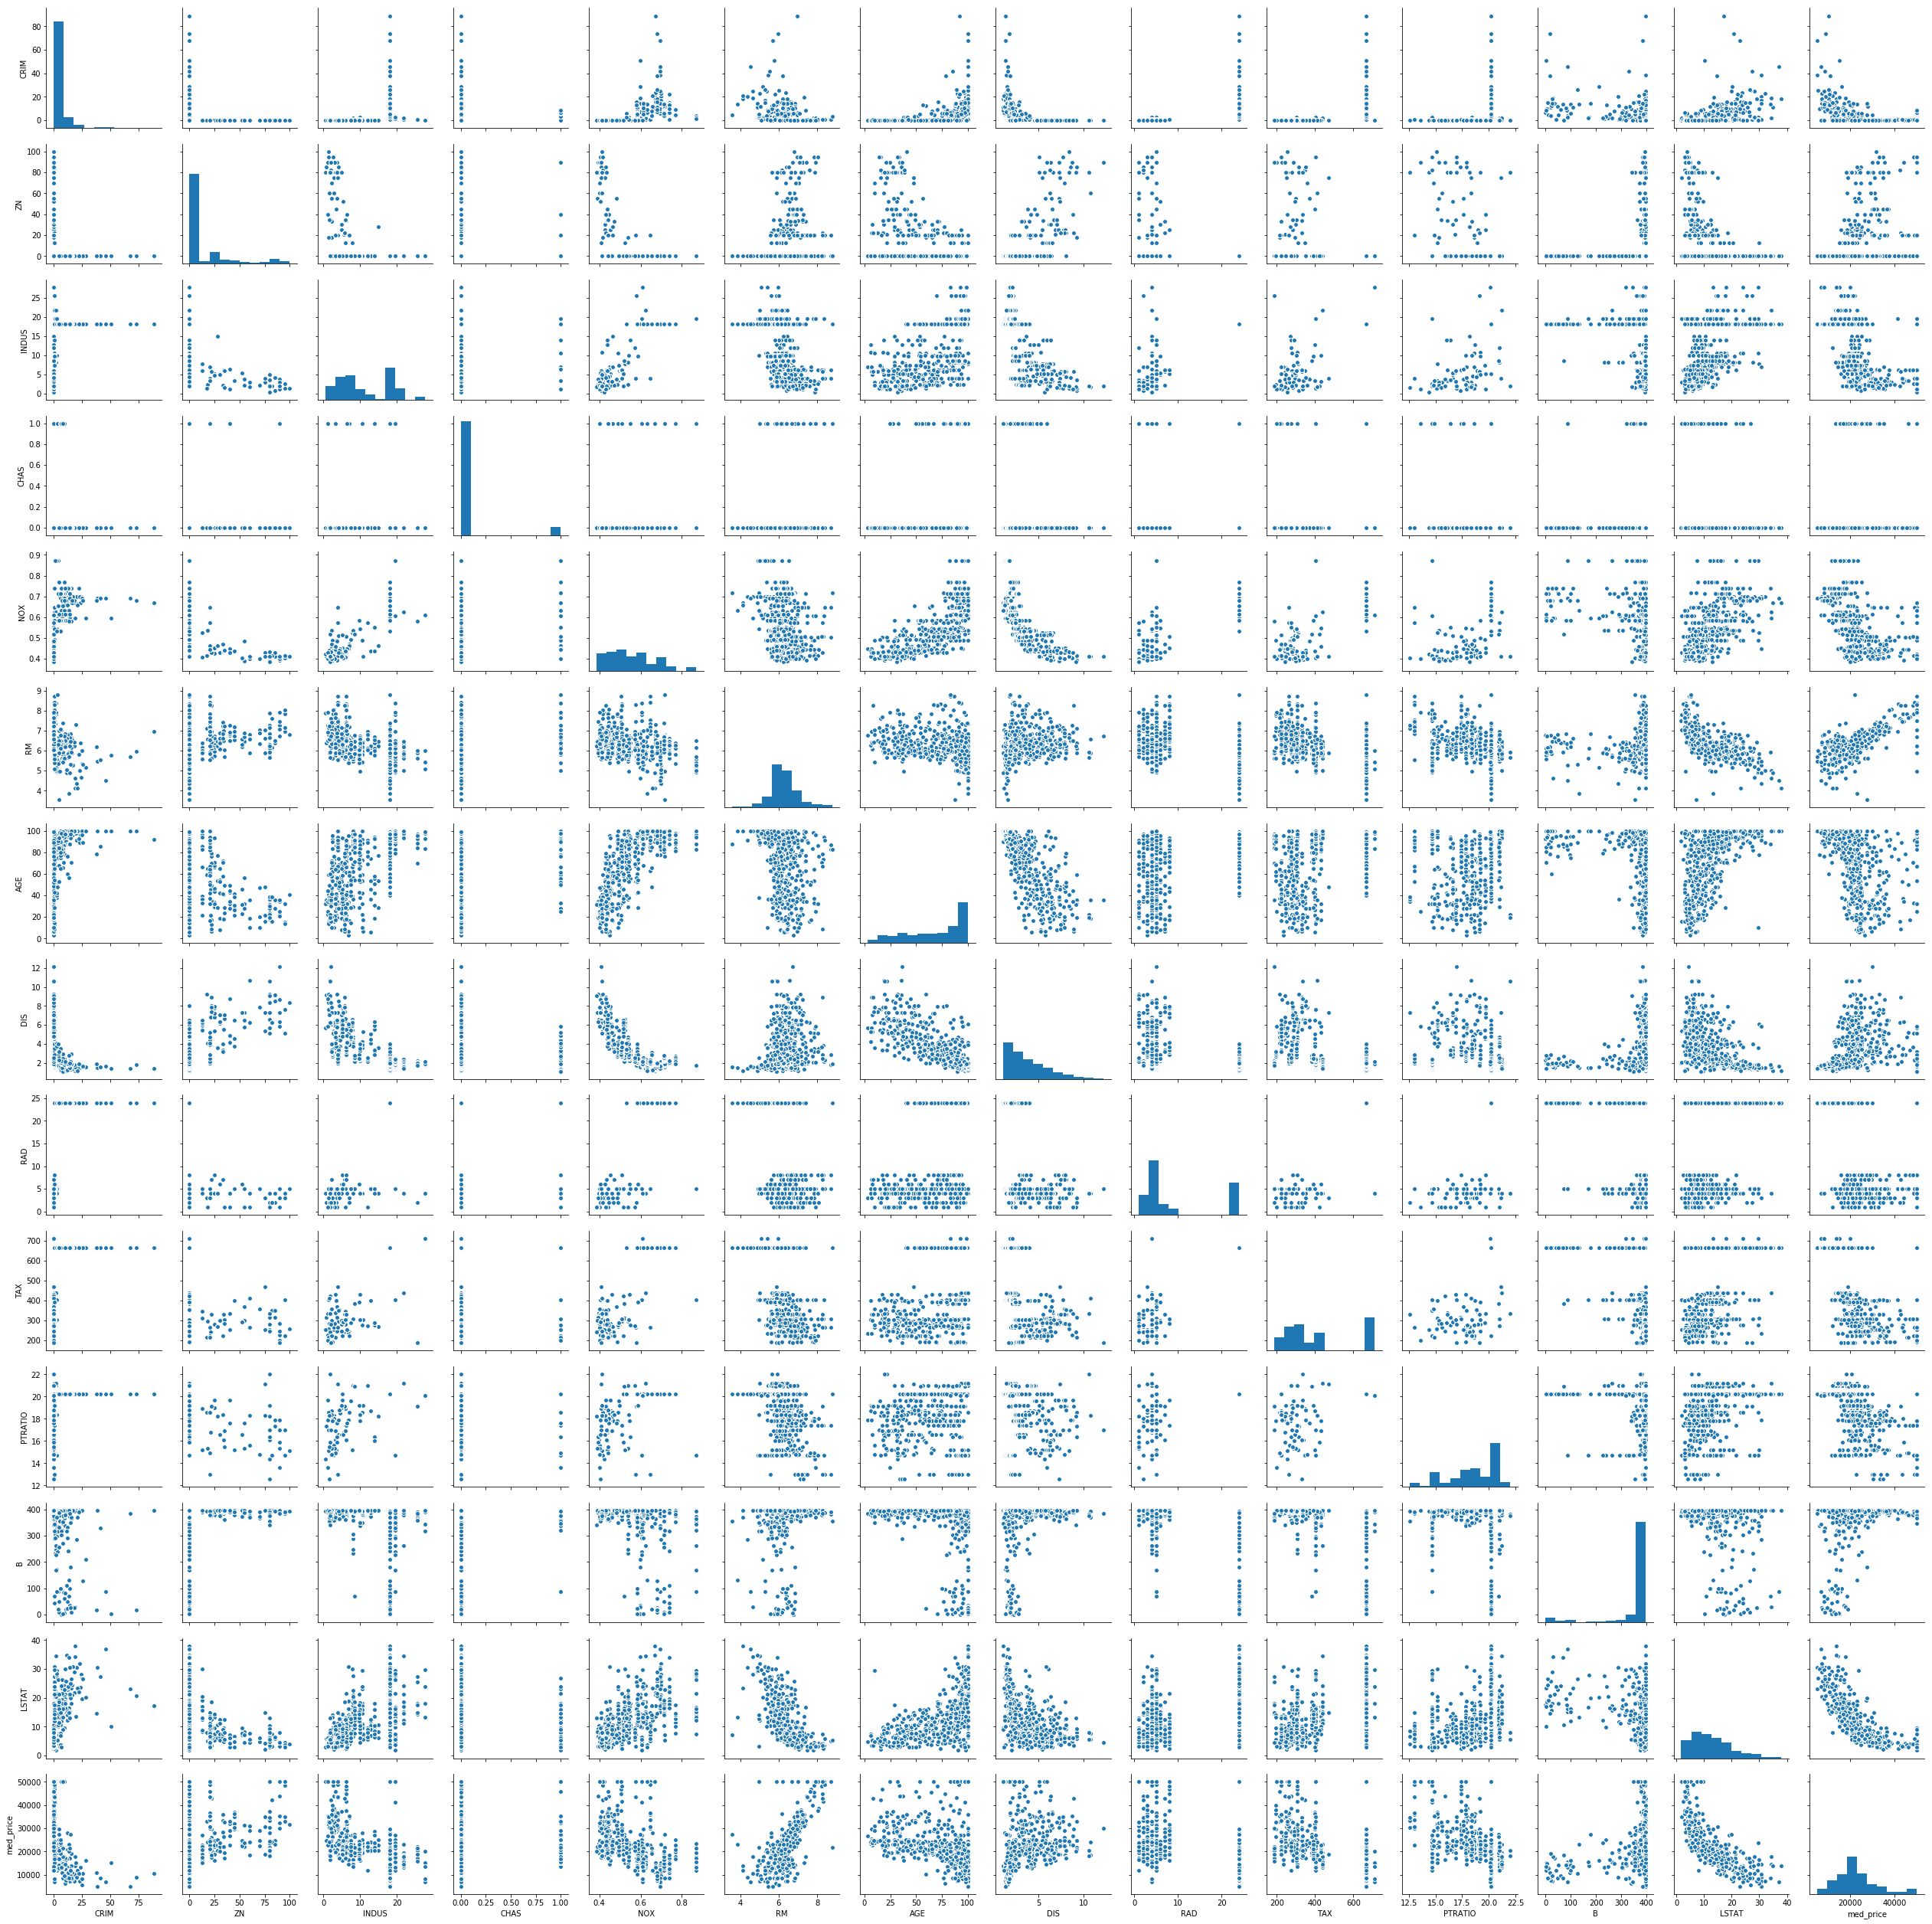

In [7]:
# Create a scatterplot matrix of all columns using `sns.pairplot` (and save it as a .png for easier viewing)
sns_plot = sns.pairplot(bos_df)
sns_plot.savefig("output.png")

## Modeling

In [15]:
# Create (and fit) a simple linear model using *only* the most correlated variable
univariate_model = smf.ols("med_price ~ LSTAT", data = bos_df).fit()

In [16]:
# Display a summary of your model -- note the r squared and the magnitude / significance of the beta value
univariate_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              med_price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 24 Oct 2018   Prob (F-statistic):           5.08e-88
Time:                        14:55:37   Log-Likelihood:                -5136.8
No. Observations:                 506   AIC:                         1.028e+04
Df Residuals:                     504   BIC:                         1.029e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.455e+04    562.627     61.415      0.000    3.34e+04    3.57e+04
LSTAT       -950.0494     38.733    -24.528      0.000   -1026.148    -873.951
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Fit a model with all features
all_columns = "+".join(boston.feature_names)
all_variables = smf.ols("med_price ~ " + (all_columns), data = bos_df).fit()

In [18]:
params = pd.DataFrame(all_variables.conf_int())
params['estimate'] = pd.Series(all_variables.params)
params = params.reset_index()
params.columns = ["covar", "lower_bound", "upper_bound", "estimate"]
params

,covar,lower_bound,upper_bound,estimate
0,Intercept,26461.795475,46520.411085,36491.103280
1,CRIM,-171.442661,-42.898452,-107.170557
2,ZN,19.422410,73.368029,46.395220
3,INDUS,-99.968377,141.688856,20.860240
4,CHAS,995.659387,4381.463411,2688.561399
5,NOX,-25302.434114,-10289.083206,-17795.758660
6,RM,2983.470297,4626.034624,3804.752460
7,AGE,-25.205373,26.707497,0.751062
8,DIS,-1867.703319,-1083.814274,-1475.758797
9,RAD,175.323420,435.986657,305.655038


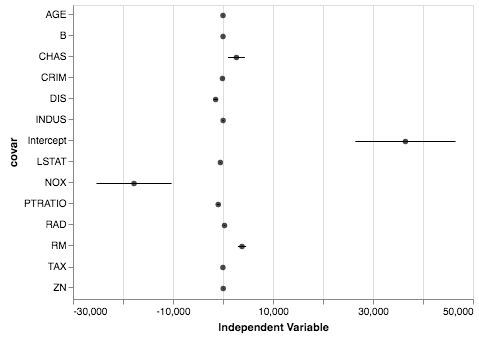

In [19]:
# Graph the parameters
# plt.figure(figsize=(20,10))
# plt.errorbar(x="covar", y="estimate", yerr=[params.lower_bound - params.estimate, params.upper_bound - params.estimate], data=params, fmt='.k')

points = alt.Chart(params).mark_point(filled=True).encode(
    alt.X(
        'estimate',
        scale=alt.Scale(zero=False),
        axis=alt.Axis(title='Independent Variable')
    ),
    y='covar',
    color=alt.value('black')
)

error_bars = alt.Chart(params).mark_rule().encode(
    x='lower_bound',
    x2='upper_bound',
    y='covar'
).interactive()

points + error_bars

## Validation

How much variation in housing price is explained by the independent variables in each model?

In [21]:
# Print out the R squared value
print("Univariate:" + str(round(univariate_model.rsquared, 2)) + ", Multivariate:" + str(round(all_variables.rsquared, 2)))

Univariate:0.54, Multivariate:0.74


If you used the model to predict your outcome based on the independent variables (i.e., plug your data into the formula of your model), how close are your predictions ("Y hat") to the observed data? 

(array([  1.,  21., 143., 177.,  75.,  43.,  18.,   8.,  17.,   3.]),
 array([-15167.45197177, -11200.6938284 ,  -7233.93568503,  -3267.17754166,
           699.58060171,   4666.33874508,   8633.09688845,  12599.85503182,
         16566.61317519,  20533.37131856,  24500.12946193]),
 <a list of 10 Patch objects>)

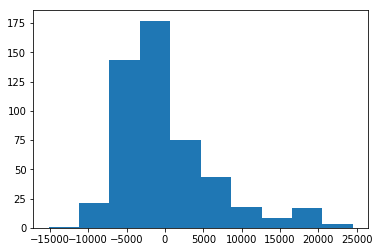

In [22]:
# View a histogram of residuals (how far your predictions are from your data)
plt.hist(univariate_model.resid)

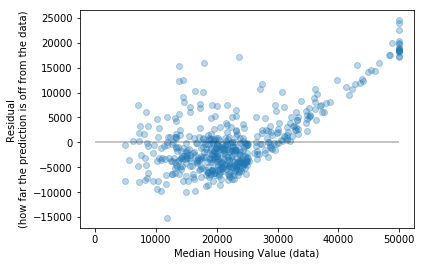

In [23]:
# Plot your residuals against the data: note the median values that the model does a poor value of predicting!
plt.scatter(x = bos_df.med_price, y = univariate_model.resid, alpha=.3)
plt.xlabel("Median Housing Value (data)")
plt.ylabel("Residual \n(how far the prediction is off from the data)")
plt.hlines(y = 0, xmin =0, xmax = 50000, alpha = .3)

Text(0,0.5,'Prediction \n (Y hat)')

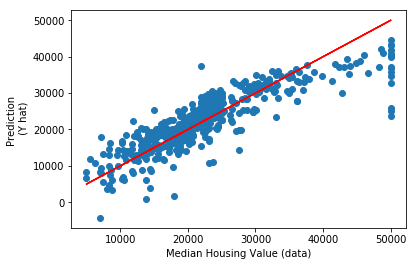

In [24]:
# For a similar comparison, plot your predictions against the data -- note where our predictions are poor!
plt.scatter(x = bos_df.med_price, y = all_variables.predict())
plt.xlabel("Median Housing Value (data)")
plt.plot(bos_df.med_price, bos_df.med_price, color = "red")
plt.ylabel("Prediction \n (Y hat)")